# Quantium /  Data Analytics - Job Simulation

In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import xlrd
import re
import statsmodels.api as sm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import data files into data frames


In [5]:
customerdata = pd.read_csv ('QVI_purchase_behaviour.csv')
transactiondata = pd.read_excel ('QVI_transaction_data .xlsx')



# Exploratory Data Analysis


Initially, we need to inspect the data to ensure its suitability for our analysis.

In [6]:
print("Customer Data Info:")
print(customerdata.info())

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [7]:
customerdata.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
customerdata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
cus_df = customerdata.copy()
cus_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [10]:
print("\nTransaction Data Info:")
print(transactiondata.info())


Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


In [11]:
transactiondata.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [12]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
trans_df = transactiondata.copy()

In [14]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [15]:
print(trans_df.columns)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [16]:
trans_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Even though it appears that we have chip purchases, we need to verify that the items are indeed chips by examining the frequency of words in the product names. To facilitate this process, we'll strip the digits and symbols from the names to enhance clarity.

In [17]:
prod_name = trans_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','')
prod_name = prod_name.str.replace(r'&',' ')

These lines of code are used to manipulate the product names within the trans_df DataFrame. In the first line, regular expressions are utilized to remove portions of the product names that consist of numbers followed by 'g' or 'G', which likely represent quantities (e.g., grams). In the second line, the '&' characters within the product names are replaced with spaces, presumably to separate different components or flavors. These operations aim to clean and standardize the product names within the DataFrame.

In [18]:
word_counts = pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): # show all rows
  display(word_counts)

175g                  60561
Chips                 49770
150g                  41633
Kettle                41288
Smiths                28860
Salt                  27976
Cheese                27890
Pringles              25102
134g                  25102
Doritos               24962
Crinkle               23960
110g                  22387
Corn                  22063
Original              21560
Cut                   20754
Chip                  18645
170g                  18502
Salsa                 18094
Chicken               15407
Chilli                15390
165g                  15297
Sea                   14145
Thins                 14075
Sour                  13882
Crisps                12607
330g                  12540
Vinegar               12402
300g                  12041
RRD                   11894
Sweet                 11060
Infuzions             11057
Supreme               10963
Chives                10951
Cream                 10723
WW                    10320
Popd                

The purpose of this code is to count the frequencies of words in product names and display these frequencies in descending order. It achieves this by splitting the product names into individual words, counting the occurrences of each word, and then displaying these counts in descending order.

In [19]:
trans_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [20]:
trans_df.isnull().values.any()

False

In [21]:
trans_df.loc[trans_df['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [22]:
top_buyers = trans_df.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().sort_values(ascending=False)
large_transactions = trans_df[trans_df['LYLTY_CARD_NBR'].isin(top_buyers.head().index)]

Grouping and Sorting: By grouping the total shopping amounts of customers and sorting them from largest to smallest, you can find the customers who made the largest purchases.

In [23]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Customers Who Make Large Purchases in One Transaction: You can find all transactions where a customer purchased more than 200 items in a single transaction.

In [24]:
single_purchase_outliers = trans_df[trans_df['PROD_QTY'] > 50]

In [25]:
single_purchase_outliers.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


This customer has carried out these transactions. They might have been for business purposes, so we can verify if they made any additional purchases.

In [26]:
trans_df.loc[trans_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [27]:
# Change date from xls integer dates to date format in customer data
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], unit='D', origin='1899-12-30')
print(trans_df['DATE'].dtype) # check format of replacement date column 

datetime64[ns]


In [28]:
# Remove the transactions
trans_df = trans_df[trans_df['LYLTY_CARD_NBR'] != 226000]
trans_df.shape # check for a reduction of 2 rows (i.e. 246740 rows)

(264834, 8)

In [29]:
trans_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


In [30]:
count = trans_df.groupby(trans_df['DATE'].dt.date).size().reset_index(name = 'COUNT')
count.shape


(364, 2)

In [31]:
trans_df.sort_values(by='DATE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
205333,2018-07-01,24,24109,20881,54,CCs Original 175g,2,4.2
202059,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8
102495,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,2,8.8
217968,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2
149892,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,2,9.2
...,...,...,...,...,...,...,...,...
152885,2019-06-30,26,26054,22482,34,Pringles Slt Vingar 134g,2,7.4
77974,2019-06-30,201,201371,201571,36,Kettle Chilli 175g,2,10.8
51400,2019-06-30,222,222089,222019,114,Kettle Sensations Siracha Lime 150g,2,9.2
132841,2019-06-30,230,230102,232603,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [32]:
date_counts = trans_df.groupby('DATE').size()

In [33]:
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The missing date is Christmas day, a public holiday, so it is expected that there are no sales on this day. Now we move onto creating other features such as the pack size, and checking this for any outliers.

In [34]:
trans_df.insert(8, "PACK_SIZE", trans_df['PROD_NAME'].str.extract('(\d+)').astype(float), True)


<>:1: DeprecationWarning: invalid escape sequence '\d'
<>:1: DeprecationWarning: invalid escape sequence '\d'
/var/folders/_x/dv4pbcy54ssfgw76pnj6ng4w0000gn/T/ipykernel_73788/2623170698.py:1: DeprecationWarning: invalid escape sequence '\d'
  trans_df.insert(8, "PACK_SIZE", trans_df['PROD_NAME'].str.extract('(\d+)').astype(float), True)


In [35]:
trans_df.sort_values(by='PACK_SIZE')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
168991,2018-11-20,232,232155,236068,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
78107,2018-11-23,207,207153,205497,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
78056,2019-06-08,205,205066,204133,38,Infuzions Mango Chutny Papadums 70g,1,2.4,70.0
247504,2018-07-03,121,121379,124482,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
27670,2019-06-30,230,230174,233107,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
57372,2018-10-26,40,40025,36217,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
115324,2019-05-24,235,235133,238063,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0
57373,2018-12-10,40,40025,36218,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0
57127,2019-01-03,35,35397,31936,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380.0


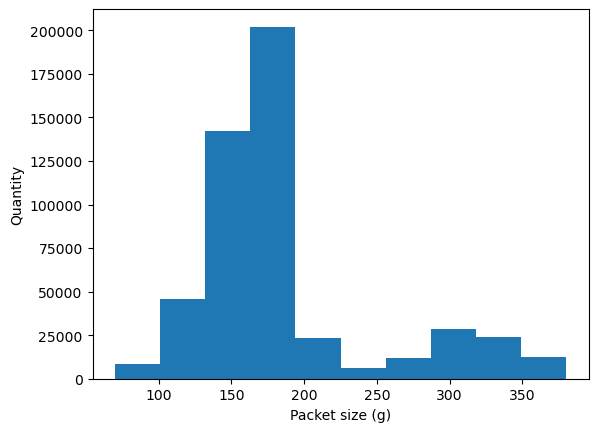

In [36]:
plt.hist(trans_df['PACK_SIZE'], weights=trans_df['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity');

In [37]:
trans_df.insert(9, "BRAND_NAME",trans_df['PROD_NAME'].str.split().str.get(0), True)
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


In [38]:
trans_df["BRAND_NAME"].unique()


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

Some brand names have been doubled up. Replace all contractions and double ups with their full name.



In [39]:
def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 

# Then apply the function to clean the brand names
trans_df["BRAND_NAME"] = trans_df.apply(lambda line: replace_brandname(line), axis=1)

# Check that there are no duplicate brands 
trans_df["BRAND_NAME"].unique()

/var/folders/_x/dv4pbcy54ssfgw76pnj6ng4w0000gn/T/ipykernel_73788/2348199274.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df["BRAND_NAME"] = trans_df.apply(lambda line: replace_brandname(line), axis=1)


array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

Now we aim to analyze the customer data. We can create summaries and review the classifications within this dataset.







In [40]:
cust_df = customerdata.copy()
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [41]:
cust_df = cust_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})

In [42]:
cust_df.describe()


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [43]:
cust_df["MEMBER_TYPE"].unique()


array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [44]:
cust_df["LIFESTAGE"].unique()


array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [45]:
full_df = trans_df.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))
full_df = full_df.reset_index()
full_df = full_df.sort_values(by='DATE').reset_index(drop=True)
full_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165.0,Red Rock Deli,OLDER SINGLES/COUPLES,Premium
1,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110.0,Cobs,RETIREES,Mainstream
2,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150.0,Kettle,YOUNG FAMILIES,Premium
3,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,YOUNG FAMILIES,Mainstream
4,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150.0,Red Rock Deli,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,90228,2019-06-30,90,88954,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
264830,199122,2019-06-30,199,198088,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,NEW FAMILIES,Premium
264831,199117,2019-06-30,199,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream
264832,245056,2019-06-30,245,247444,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110.0,Cobs,YOUNG SINGLES/COUPLES,Mainstream


In [46]:
full_df.isnull().values.any()


False

In [47]:
full_df.to_csv('QVI_fulldata.csv')



Analyzing customer segments through data examination:
Now that the data has been refined, we aim to explore notable patterns in the chip market to facilitate the recommendation of a business strategy.

To accomplish this, we plan to assess several metrics, including:

Identifying the highest chip spenders (total sales), categorizing customers by life stage and the level of premium in their general purchasing behavior.
Determining the quantity of customers within each segment.
Evaluating the chip purchase frequency per customer within each segment.
Calculating the average chip price per customer segment.
Additionally, we could request further insights from the data team, such as:

Total spend by customers over a period and per transaction, to gauge the proportion of their grocery expenditure allocated to chips.
Expenditure on alternative snacks like crackers and biscuits, to ascertain chip preference and purchase frequency relative to other snacks.
The distribution of customers across each customer segment, allowing for comparison against the overall mix of chip purchasers.
Firstly, we aim to examine the distribution of total sales by LIFESTAGE and MEMBER_TYPE.

In [48]:
total_sales_cust = full_df.groupby(['LIFESTAGE','MEMBER_TYPE'], as_index = False)['TOT_SALES'].agg(['sum'])
total_sales_cust = total_sales_cust.rename(columns={'sum': 'sum_tot_sales'})
total_sales_cust.sort_values(by = "sum_tot_sales", ascending = False)

,LIFESTAGE,MEMBER_TYPE,sum_tot_sales
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05
15,YOUNG FAMILIES,Budget,139345.85
9,OLDER SINGLES/COUPLES,Budget,136769.80
10,OLDER SINGLES/COUPLES,Mainstream,133393.80
11,OLDER SINGLES/COUPLES,Premium,132263.15
12,RETIREES,Budget,113147.80
7,OLDER FAMILIES,Mainstream,103445.55
14,RETIREES,Premium,97646.05


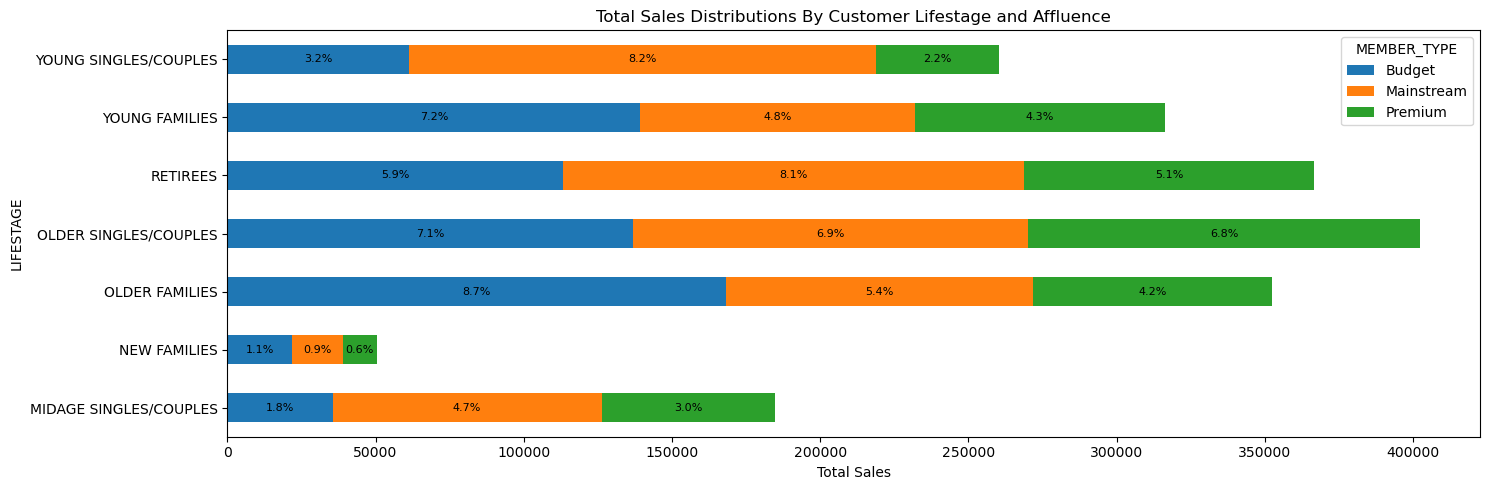

In [49]:
# Get the total sales more directly
total_sales = full_df['TOT_SALES'].sum()

# Plot a breakdown of the total sales by lifestage and member type in a more efficient way
total_sales_breakdown = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['TOT_SALES'].agg(['sum', 'mean']).unstack('MEMBER_TYPE').fillna(0)
ax = total_sales_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(15, 5))

# Improved loop for adding percentage labels to the bars
for rect in ax.patches:
    width = rect.get_width()  # The width of the bar
    label = width / total_sales * 100  # The percentage of the bar relative to total sales

    # Only add labels to bars with a significant width to keep the chart readable
    if width > 0:
        x = rect.get_x() + width / 2  # X position for the label (center of the bar)
        y = rect.get_y() + rect.get_height() / 2  # Y position for the label (center of the bar height)
        ax.text(x, y, f'{label:.1f}%', ha='center', va='center', fontsize=8)

ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Lifestage and Affluence')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Here, we observe that the majority of sales originate from Older families - Budget, Young singles/couples - Mainstream, and Retirees - Mainstream. It appears that this trend may be attributed to the customer demographics within each segment.








In [50]:
len(cust_df['LYLTY_CARD_NBR'].unique()) == cust_df.shape[0]


True

In [51]:
len(cust_df['LYLTY_CARD_NBR'].unique()) == len(full_df['LYLTY_CARD_NBR'].unique())


False

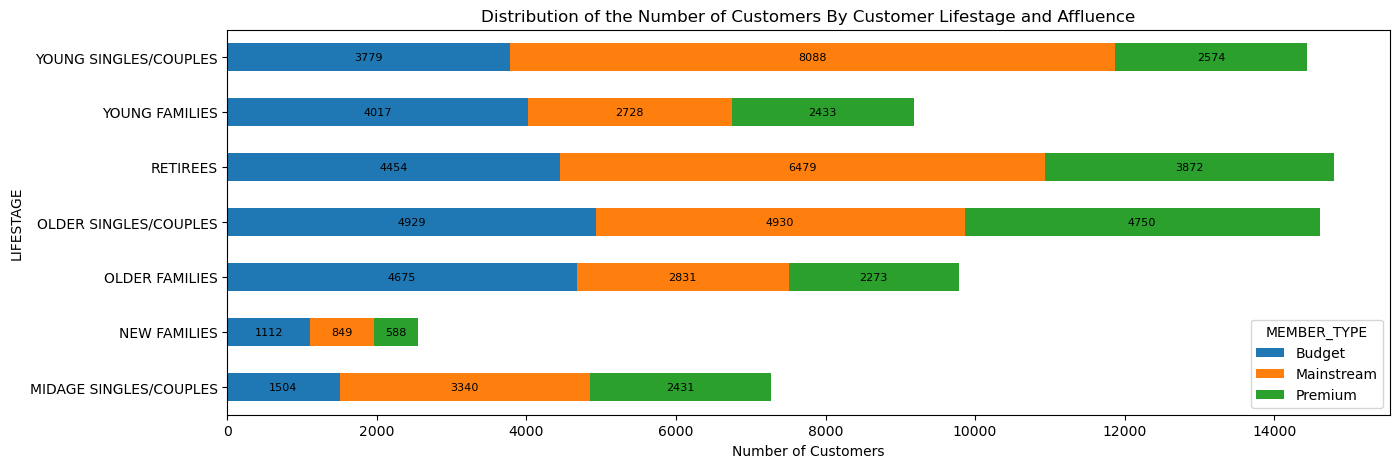

In [52]:
import matplotlib.pyplot as plt

# Group data by 'LIFESTAGE' and 'MEMBER_TYPE', then count unique 'LYLTY_CARD_NBR' values
customer_counts = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique().unstack('MEMBER_TYPE').fillna(0)

# Plot horizontal stacked bar chart
ax = customer_counts.plot(kind='barh', stacked=True, figsize=(15, 5), title='Distribution of the Number of Customers By Customer Lifestage and Affluence')

# Set x-axis label
ax.set_xlabel("Number of Customers")

# Iterate through the rectangles to add labels
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Only add labels to bars with non-zero width
    if width > 0:
        label_position_x = x + width / 2
        label_position_y = y + height / 2
        ax.text(label_position_x, label_position_y, f'{int(width)}', ha='center', va='center', fontsize=8)

plt.show()

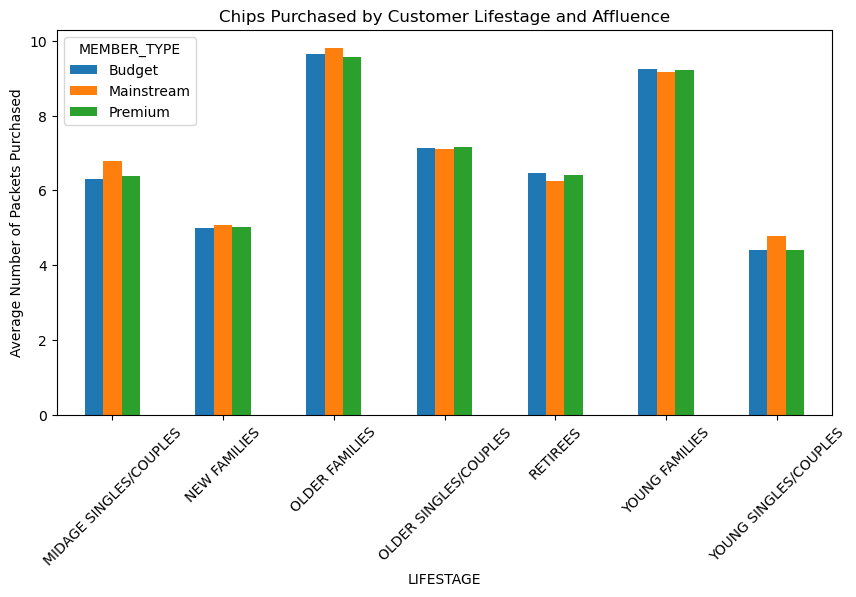

In [53]:
# Calculate the average number of packets purchased per customer by 'LIFESTAGE' and 'MEMBER_TYPE'
average_packets = (
    full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['PROD_QTY'].sum() /
    full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique()
).unstack('MEMBER_TYPE').fillna(0)

# Plot the data with a new color scheme
ax = average_packets.plot.bar(
    stacked=False, figsize=(10, 5), 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Custom color palette
)

# Set y-axis label and chart title
ax.set_ylabel("Average Number of Packets Purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Affluence')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [54]:
full_df['UNIT_PRICE'] = full_df['TOT_SALES']/full_df['PROD_QTY']


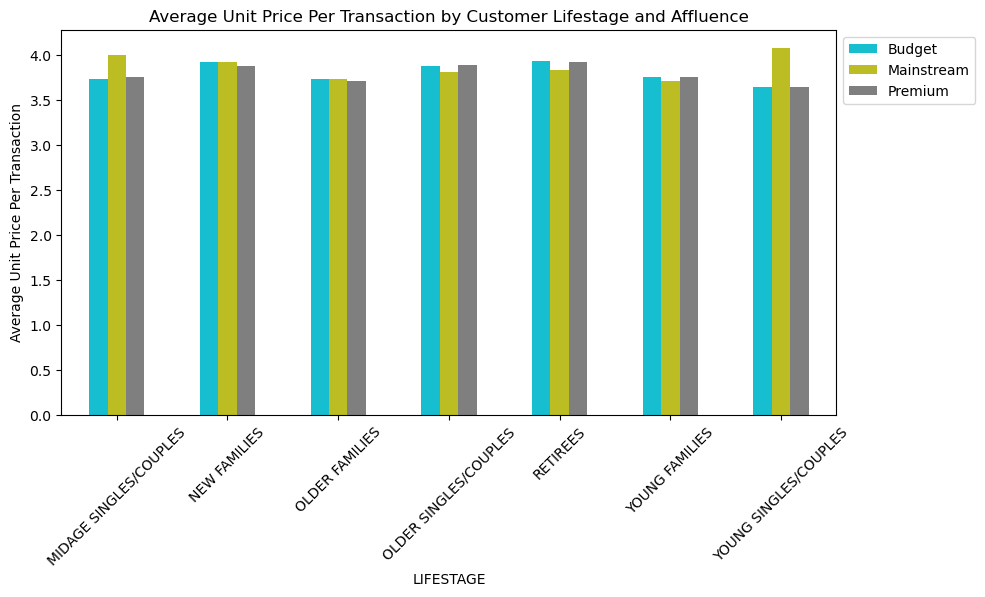

In [55]:
import matplotlib.pyplot as plt

# Calculate the average unit price per transaction by 'LIFESTAGE' and 'MEMBER_TYPE'
average_unit_price = (
    full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['UNIT_PRICE']
    .mean()  # Calculate the mean unit price
    .unstack('MEMBER_TYPE')  # Pivot 'MEMBER_TYPE' columns for separate line items
    .fillna(0)  # Fill any missing values with 0
)

# Plot the data with a new color scheme
ax = average_unit_price.plot.bar(
    stacked=False, figsize=(10, 5), 
    color=['#17becf', '#bcbd22', '#7f7f7f', '#e377c2', '#8c564b', '#9467bd']  # Custom color palette
)

# Set y-axis label and chart title
ax.set_ylabel("Average Unit Price Per Transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Affluence')

# Improve legend positioning and x-axis label readability
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)

plt.show()


For individuals and couples in the young and middle-aged categories, those in the mainstream segment tend to spend more per packet of chips compared to those in the budget and premium segments. Considering that both the overall sales and the number of customers purchasing chips are greater in these segments relative to the non-mainstream ones, it implies that chips might not be the preferred snack choice for the latter. Additional insights into their shopping behaviors could provide more clarity.

Given the modest variance in the average unit price, it's worth examining whether this discrepancy holds statistical significance through a t-test.

In [57]:
from scipy.stats import ttest_ind

# Identify the groups to test the hypthesis with 
mainstream = full_df["MEMBER_TYPE"] == "Mainstream"
young_midage = (full_df["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (full_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = full_df["MEMBER_TYPE"] != "Mainstream"

group1 = full_df[mainstream & young_midage]["UNIT_PRICE"]
group2 = full_df[premium_budget & young_midage]["UNIT_PRICE"]

# Generate the t-test 
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)

print(pval, stat)

0.0 40.60989476220137


The t-test yielded a p-value of 0.0 and a t-statistic of 40.61, indicating a statistically significant difference in unit prices between mainstream young and mid-age singles/couples and their budget or premium counterparts. This suggests that the mainstream segment may be willing to pay more for chips than other groups.

Exploring specific customer segments for deeper insights:
We've uncovered several intriguing findings that warrant further investigation. It could be beneficial to focus on customer segments that contribute most to sales, with the aim of either retaining them or boosting sales even further. For example, we could examine whether mainstream young singles/couples have a preference for a particular brand of chips

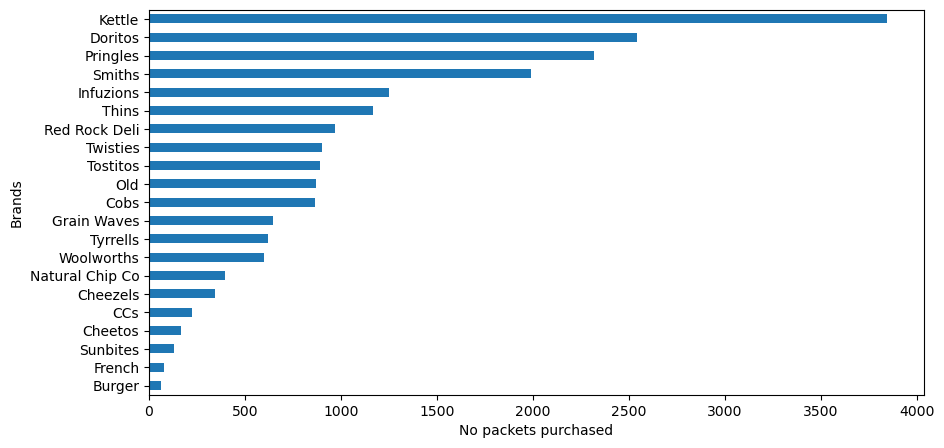

In [58]:
young_mainstream = full_df.loc[full_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))
ax.set_xlabel("No packets purchased")
ax.set_ylabel("Brands")
plt.show()

In [59]:
temp = full_df.copy()
temp["group"] = temp["LIFESTAGE"] + ' - ' + temp['MEMBER_TYPE']

In [60]:
groups = pd.get_dummies(temp["group"])
brands = pd.get_dummies(temp["BRAND_NAME"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,Old,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264830,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264831,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
freq_groupsbrands = apriori(groups_brands, min_support=0.008, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5)
rules.sort_values('confidence', ascending = False, inplace = True)
set_temp = temp["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,0.002239,1.034852,0.167405
0,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044836,0.155901,0.008065,0.179889,1.153863,0.001075,1.029249,0.139605
16,(RETIREES - Budget),(Kettle),0.057398,0.155901,0.009787,0.170515,1.093737,0.000839,1.017618,0.090922
25,(RETIREES - Premium),(Kettle),0.049450,0.155901,0.008368,0.169212,1.085378,0.000658,1.016022,0.082754
9,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069504,0.155901,0.011573,0.166513,1.068064,0.000738,1.012731,0.068487
14,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067038,0.155901,0.011128,0.165991,1.064716,0.000676,1.012097,0.065150
20,(RETIREES - Mainstream),(Kettle),0.081055,0.155901,0.012785,0.157738,1.011779,0.000149,1.002180,0.012669
10,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.069168,0.155901,0.010705,0.154766,0.992716,-0.000079,0.998656,-0.007821
27,(YOUNG FAMILIES - Budget),(Kettle),0.072204,0.155901,0.010357,0.143447,0.920116,-0.000899,0.985460,-0.085569
5,(OLDER FAMILIES - Budget),(Kettle),0.087451,0.155901,0.012536,0.143351,0.919495,-0.001098,0.985349,-0.087544


In [62]:
rules[rules['antecedents'] == {'YOUNG SINGLES/COUPLES - Mainstream'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,0.002239,1.034852,0.167405
30,(YOUNG SINGLES/COUPLES - Mainstream),(Doritos),0.078744,0.106274,0.009595,0.121847,1.146536,0.001226,1.017734,0.138732
34,(YOUNG SINGLES/COUPLES - Mainstream),(Pringles),0.078744,0.094784,0.008741,0.111010,1.171189,0.001278,1.018252,0.158660


In [63]:
# find the target rating proportion
target_segment = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='target')
target_segment.target /= young_mainstream["PROD_QTY"].sum()

# find the other rating proportion
not_young_mainstream = full_df.loc[full_df['LIFESTAGE'] != "YOUNG SINGLES/COUPLES"]
not_young_mainstream = not_young_mainstream.loc[not_young_mainstream['MEMBER_TYPE'] != "Mainstream"]
other = not_young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='other')
other.other /= not_young_mainstream["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))
# full_df = trans_df.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,BRANDS,target,other,affinity
8,Tyrrells,0.016023,0.012459,1.286010
13,Twisties,0.023297,0.018298,1.273158
12,Tostitos,0.023038,0.018588,1.239370
11,Old,0.022443,0.018185,1.234108
20,Kettle,0.099503,0.080691,1.233133
18,Pringles,0.059924,0.048911,1.225166
19,Doritos,0.065774,0.054761,1.201124
10,Cobs,0.022365,0.018645,1.199512
16,Infuzions,0.032357,0.027897,1.159870
9,Grain Waves,0.016722,0.015112,1.106537


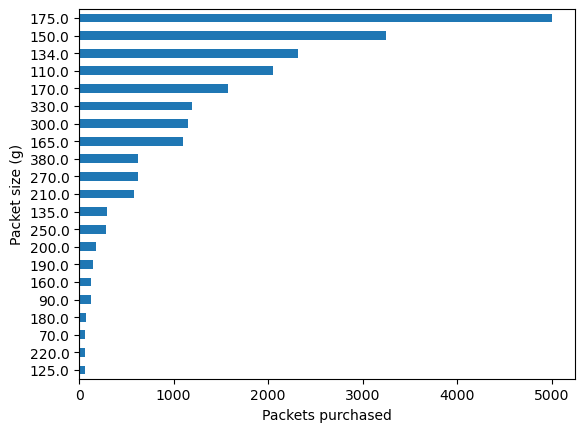

In [64]:
young_mainstream = full_df.loc[full_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).plot.barh()
ax.set_ylabel("Packet size (g)")
ax.set_xlabel("Packets purchased")
plt.show()

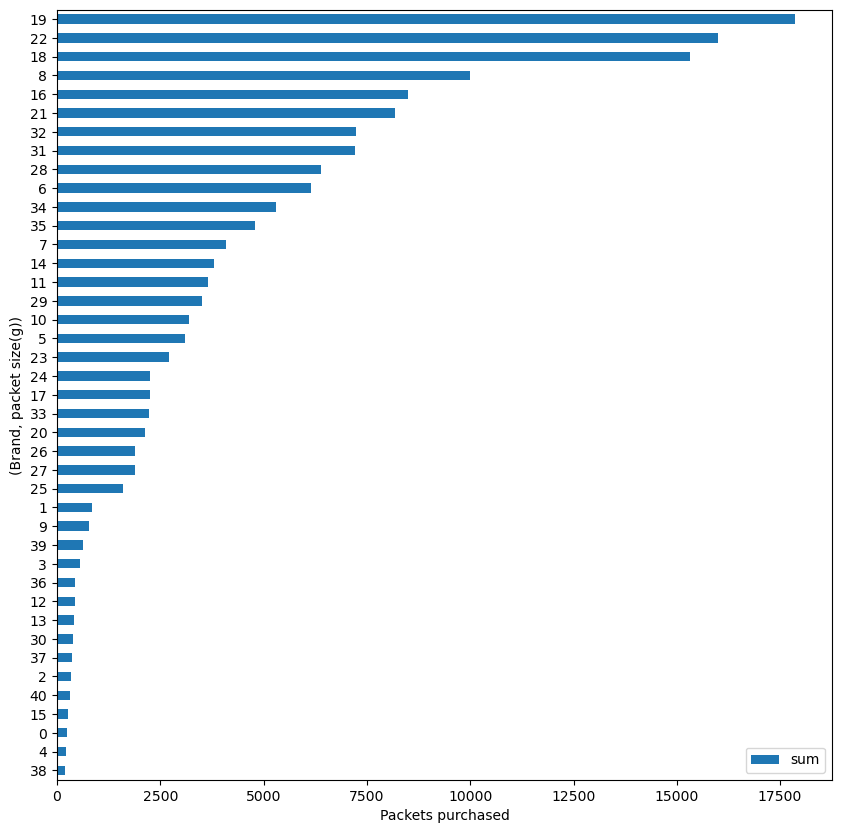

In [65]:
# Also want to check which brands correspond to what sized packets. 
brand_size = young_mainstream.groupby(['BRAND_NAME','PACK_SIZE'], as_index = False)['TOT_SALES'].agg(['sum'])
ax = brand_size.sort_values(by = 'sum').plot.barh(y = "sum", figsize=(10,10))
ax.set_ylabel("(Brand, packet size(g))")
ax.set_xlabel("Packets purchased")
plt.show()

In [66]:
groups = pd.get_dummies(temp["group"])
brands = pd.get_dummies(temp["PACK_SIZE"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,180.0,190.0,200.0,210.0,220.0,250.0,270.0,300.0,330.0,380.0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264830,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264831,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
freq_groupsbrands = apriori(groups_brands, min_support=0.009, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5)
rules.sort_values('confidence', ascending = False, inplace = True)
set_temp = temp["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,(YOUNG FAMILIES - Premium),(175.0),0.043661,0.250685,0.011320,0.259275,1.034266,0.000375,1.011597,0.034643
34,(YOUNG FAMILIES - Budget),(175.0),0.072204,0.250685,0.018581,0.257348,1.026576,0.000481,1.008971,0.027903
24,(RETIREES - Budget),(175.0),0.057398,0.250685,0.014526,0.253075,1.009534,0.000137,1.003200,0.010019
31,(RETIREES - Premium),(175.0),0.049450,0.250685,0.012483,0.252443,1.007013,0.000087,1.002352,0.007327
6,(OLDER FAMILIES - Mainstream),(175.0),0.053785,0.250685,0.013548,0.251896,1.004828,0.000065,1.001618,0.005077
8,(OLDER FAMILIES - Premium),(175.0),0.042253,0.250685,0.010633,0.251653,1.003861,0.000041,1.001293,0.004016
12,(OLDER SINGLES/COUPLES - Budget),(175.0),0.069504,0.250685,0.017464,0.251263,1.002305,0.000040,1.000772,0.002471
20,(OLDER SINGLES/COUPLES - Premium),(175.0),0.067038,0.250685,0.016833,0.251098,1.001648,0.000028,1.000551,0.001763
4,(OLDER FAMILIES - Budget),(175.0),0.087451,0.250685,0.021931,0.250777,1.000366,0.000008,1.000123,0.000401
0,(MIDAGE SINGLES/COUPLES - Mainstream),(175.0),0.044836,0.250685,0.011233,0.250547,0.999450,-0.000006,0.999816,-0.000576


In [68]:
# find the target rating proportion
target_segment = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='target')
target_segment.target /= young_mainstream["PROD_QTY"].sum()

# find the other rating proportion
other = not_young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='other')
other.other /= not_young_mainstream["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('SIZES').join(other.set_index('SIZES'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,SIZES,target,other,affinity
11,270.0,0.016049,0.012078,1.328823
12,380.0,0.016204,0.012467,1.299815
15,330.0,0.030933,0.024657,1.254517
10,210.0,0.014910,0.012092,1.233075
18,134.0,0.059924,0.048911,1.225166
17,110.0,0.053091,0.043483,1.220965
9,135.0,0.007507,0.006292,1.193131
8,250.0,0.007248,0.006221,1.165087
16,170.0,0.040769,0.038984,1.045796
14,300.0,0.029742,0.029640,1.003438


In this analysis, we observe that mainstream young singles/couples exhibit a 32% higher propensity to buy 270g chip packets compared to other demographic groups. Conversely, their likelihood of buying 220g packets is reduced by half. Notably, 270g packets are typically associated with Twisties, while 220g packets are linked to Burger Rings. This aligns with brand preference trends identified in our analysis.

Insight Summary:
The top contributors to overall chip sales are as follows:

1. Older families in the Budget segment
2. Young singles/couples in the Mainstream segment
3. Retirees in the Mainstream segment

Mainstream young singles/couples represent the largest demographic, followed by mainstream retirees, which accounts for their significant sales contributions. Although population size isn't a key factor for older families in the budget category, families, in general, tend to purchase more chips per capita. Importantly, mainstream young singles/couples demonstrate the highest expenditure per transaction, a difference that is statistically significant when compared to their non-mainstream counterparts. Further investigation into the buying habits of mainstream young singles/couples reveals a 28% higher likelihood of purchasing Tyrells chips over other brands. While Kettle chips remain the most purchased across various groups, this segment shows a 50% lower inclination towards Burger Rings, correlating with their preference for certain packet sizes, as 220g packets are unique to Burger Rings. Additionally, the preference for 270g packets, predominantly Twisties, is 32% higher among mainstream young singles/couples than other groups. The 175g packet size emerges as the most popular choice across numerous segments.

Marketing Strategy:
Considering the preference for Tyrells and the 270g Twisties packets among mainstream young singles/couples, positioning these products more prominently for this demographic could be advantageous. Given the widespread popularity of Kettle chips, placing Tyrells and Twisties in proximity to Kettle products might further appeal to our primary target segment of mainstream young singles/couples. This approach, focused on aligning product placement with brand preferences, could also be tailored to other demographic groups that predominantly purchase Kettle chips, potentially boosting overall sales.